In [1]:
# !conda install -c conda-forge rdkit
from rdkit import Chem
from rdkit.Chem import Draw

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

RDKit WARNING: [00:21:06] Enabling RDKit 2019.09.3 jupyter extensions


## simple impl. of rdkit.Chem

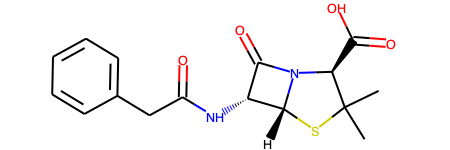

In [2]:
penicillin_g_smiles = 'CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)Cc3ccccc3)C(=O)O)C'
penicillin_g = Chem.MolFromSmiles(penicillin_g_smiles)
penicillin_g
# Draw.MolToMPL(penicillin_g, size=(200, 200))

## impl.

In [4]:
df = pd.read_csv('../reference_data/train_molecule_new_features.csv')

In [5]:
sample = df['smiles'][0]
sample

'CC1=CC(N)=NO1'

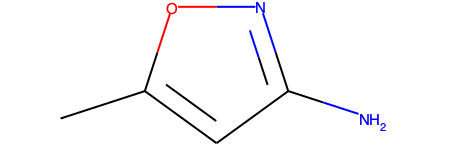

In [6]:
sample_mol = Chem.MolFromSmiles(sample)
sample_mol

In [7]:
# thanks to https://github.com/masashitsubaki/molecularGNN_smiles/blob/master/main/preprocess.py


def create_atoms(mol, atom_dict):
    """Transform the atom types in a molecule (e.g., H, C, and O)
    into the indices (e.g., H=0, C=1, and O=2).
    Note that each atom index considers the aromaticity.
    """
    atoms = [a.GetSymbol() for a in mol.GetAtoms()]
    for a in mol.GetAromaticAtoms():
        i = a.GetIdx()
        atoms[i] = (atoms[i], 'aromatic')
    atoms = [atom_dict[a] for a in atoms]
    return np.array(atoms)


def create_ijbonddict(mol, bond_dict):
    """Create a dictionary, in which each key is a node ID
    and each value is the tuples of its neighboring node
    and chemical bond (e.g., single and double) IDs.
    """
    i_jbond_dict = defaultdict(lambda: [])
    for b in mol.GetBonds():
        i, j = b.GetBeginAtomIdx(), b.GetEndAtomIdx()
        bond = bond_dict[str(b.GetBondType())]
        i_jbond_dict[i].append((j, bond))
        i_jbond_dict[j].append((i, bond))
    return i_jbond_dict

In [8]:
from collections import defaultdict

atom_dict = defaultdict(lambda: len(atom_dict))
bond_dict = defaultdict(lambda: len(bond_dict))

In [9]:
create_atoms(sample_mol, atom_dict)

array([0, 1, 1, 1, 2, 3, 4])

In [10]:
create_ijbonddict(sample_mol, bond_dict)

defaultdict(<function __main__.create_ijbonddict.<locals>.<lambda>()>,
            {0: [(1, 0)],
             1: [(0, 0), (2, 1), (6, 1)],
             2: [(1, 1), (3, 1)],
             3: [(2, 1), (4, 0), (5, 1)],
             4: [(3, 0)],
             5: [(3, 1), (6, 1)],
             6: [(5, 1), (1, 1)]})